In [1]:
import sys
!{sys.executable} -m pip install pycbc ligo-common emcee==2.2.1 --no-cache-dir
#include --no-cache-dir if running google colab but remove for sciserver

     |████████████████████████████████| 6.7 MB 5.2 MB/s 
     |████████████████████████████████| 45 kB 33.5 MB/s 
     |████████████████████████████████| 45 kB 37.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51 kB 48.7 MB/s 
     |████████████████████████████████| 7.3 MB 47.7 MB/s 
     |████████████████████████████████| 201 kB 78.4 MB/s 
     |████████████████████████████████| 48.3 MB 1.2 MB/s 
     |████████████████████████████████| 1.4 MB 66.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 78 kB 60.6 MB/s 
     |████████████████████████████████| 295 kB 56.9 MB/s 
     |████████████████████████████████| 55 kB 47.3 MB/s 
     |████████████████████████████████| 43 kB 31.6 MB/s 
  Installing build dependencies ... done
  Getting requirem

In [2]:
from pycbc.inference import models

for model_name in models.models:
    print(model_name)
from pycbc.inference import models
from pycbc.distributions import Uniform
from pycbc.inference import sampler
import pylab, numpy
from numpy.random import uniform, seed
from pycbc.distributions import Uniform
from pycbc.distributions import JointDistribution
import pylab, numpy
from scipy import stats
from pycbc.catalog import Merger
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.frame import read_frame
from pycbc.filter import highpass, resample_to_delta_t
from astropy.utils.data import download_file
from pycbc.inference import models, sampler
from pycbc.distributions import Uniform, JointDistribution, SinAngle
import numpy
import copy
from matplotlib import animation
import pylab
from matplotlib.animation import PillowWriter
from IPython.display import Image
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import h5py
import array
from matplotlib.pyplot import figure
import math
#import axes as ax

test_eggbox
test_normal
test_rosenbrock
test_volcano
test_posterior
test_prior
gaussian_noise
marginalized_phase
marginalized_polarization
marginalized_hmpolphase
brute_parallel_gaussian_marginalize
gated_gaussian_noise
gated_gaussian_margpol
single_template
relative


In [12]:
#copy your list of model names from the snapped model list in part one to the model_names below.
#the current list is for a 1.36 binary merger for tidal deformation between 0 and 1000 but change this to reflect the outputs produced
model_names=['ALF1', 'ALF2', 'ALF3', 'ALF4', 'AP1', 'AP2', 'AP3', 'AP4', 'APR4_EPP', 'BBB2', 'BGN1H1', 'BPAL12', 'BSK19', 'BSK20', 'BSK21', 'ENG', 'FPS', 'GS2', 'H1', 'H2', 'H4', 'H5', 'H6', 'H7', 'MPA1', 'MS1B_PP', 'MS1', 'MS2', 'PAL6', 'PCL2', 'QMC700', 'SLY4', 'SLY', 'SQM2', 'WFF1', 'WFF2', 'WFF3', 'APR', 'BHF_BBB2', 'KDE0V', 'KDE0V1', 'RS', 'SK255', 'SK272', 'SKB', 'SKI2', 'SKI3', 'SKI4', 'SKI6', 'SKMP', 'SKOP', 'SLY2', 'SLY230A', 'SLY9', 'HQC18']
#model_names =['BHF_BBB2'] #delete later

#define the empty lists below that will contain the values for plotting
logevidence = []                                                     #the logevidence, sorted by the order of EOSs in model_names
sortlog = []                                                         #sortlog, log evidence that will be sorted in order or valye
EOS = "BHF_BBB2"                                                     #the base EOS used in the injection, we compare the evidence of this to the evidence of the other models
file_name = f"/content/drive/MyDrive/1.36_OUTPUTS/ETRUNS/Output_{EOS}_ligo.hdf"                                 # SET the name of the base EOS file to be opened 
y = h5py.File(file_name,'r')                                         # Open the file with h5py
b = y.attrs['log_evidence']                                          #extract log_evidence with h5py and save to a variable (we will use this to normalise values later)

#The purpose of the loop below is to extract all the log evidences from each outfiles produced in the previous notebook. 
#You may need to change file_name if you've named the outputs differently but this should work with the base code
#log evidence and sortlog appear to be the same but sortlog will be sorted to value, and log_evidence then used to locate the index
#and create ordered arrays with the other parameters needed for the comparison

#for EOS in the models we are considering 
for EOS in model_names:
    
    #The file name for this may be different as said above. Don't forget to add a directory if you are using something like google colab
    file_name = f"/content/drive/MyDrive/1.36_OUTPUTS/ETRUNS/Output_{EOS}_ligo.hdf"           #/content/drive/MyDrive/1.36_OUTPUTS/ETRUNS/Output_ALF1_ligo.hdf
    #set x to be the file
    x = h5py.File(file_name,'r')

    #Log evidence recovery
    k=x.attrs['log_evidence']
    #normalise with the evidence from the injection file
    s= (k - b) 
    logevidence.append(s)   #This will be required for its index to sort the other parameters
    sortlog.append(s)       #This will be sorted by value to produce pretty graphs

sortlog.sort()                      #sort the log evidence into order by value to provide better comparison
sorted_model_names= []              #prepare an empty list into which the names of the models will be sorted according the their associated log_evidence
sorted_dlog_evidence = []           #same as above but for dlogevidence and its associated error bars

#the purpose of the next loop is to sort all the neccesary values into the order of log evidence. This is so we can plot model names and error bars in the correct order.

for value in sortlog:                    #for each log_evidence value is sortlog
    index = logevidence.index(value)     #find index for evidence in the log_evidence (this will also return the index of associated model in model_names)
    model = model_names[index]           #recovery the model name accsociated witbh the log_evidence
    #open evidence file
    file_name = f"/content/drive/MyDrive/1.36_OUTPUTS/ETRUNS/Output_{model}_ligo.hdf"   #use the model name to open the out file
    x = h5py.File(file_name,'r')           #set x to file
    dlog=x.attrs['dlog_evidence']             #extract the K value                           
    sorted_dlog_evidence.append(dlog)
    #extract & sort evidence
    sorted_model_names.append(model)   #sort model names


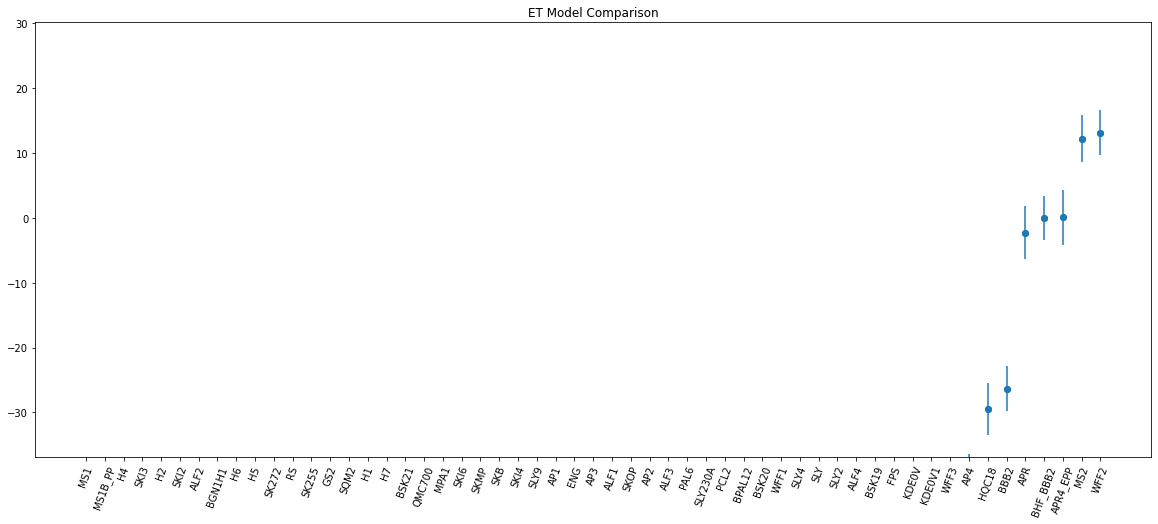

In [14]:
ticks = [i for i in range(len(model_names))]               # create integers for the model names to help in plotting
y_errormin = (sorted_dlog_evidence)                              #set lower error bar limit  (this should be sorted)            
y_errormax = y_errormin                                          #set upper error bar limit
y_error = [y_errormin, y_errormax]                               #create an array for the error bars 
x_error = np.zeros(len(model_names))                             #x_error is zero because there is no uncertainty associated with model names

labels = sorted_model_names                                      #set the model names of this 
plt.figure(figsize=(20, 8))                                      #set figure size
plt.scatter(ticks,sortlog)                                         #scatter plot with integers on x and the sorted evidences on y
plt.errorbar(ticks,sortlog,yerr=y_error,xerr=x_error,fmt='o')      #plot the associated error bars
upper = sortlog[-1]                                              #prepare boundaries using the largest value of sortlog, this is so we can analyse high likelihood models better
ymax = upper +17                                                  #no values are higher so the upper needs not be much more
ymin = upper - 50                                                #we want to see and compare the models that are most likely so a larger ymin is needed
plt.ylim(ymin,ymax)                                              #set limits for our plot
      
plt.xticks(ticks, labels)                                        #set the labels for the x-axis models 
plt.xticks(rotation=70)                                          #rotate the labels for easier reading
plt.title('ET Model Comparison')                                 #set the title (change this for other PSD runs)
plt.show()